In [1]:
# TEAM MEMBERS

# 1. PRAJWAL B S            PES1UG20CS287
# 2. PRATHAM DEEPAK RAO     PES1UG20CS306
# 3. PURVIK S NUKAL         PES1UG20CS315
# 4. RAHUL R                PES1UG20CS316

# IN THIS ASSIGNMENT WE HAVE MADE USE OF THE IMMORTALS OF MELUHA - SHIVA BY AMISH TRIPATHI 


# STEPS FOLLOWED :
# Importing all the necessary libraries
# Downloading package for sentence tokenization
# Making a list of characters
# Some preprocessing
# Creating the adjacency matrix based on if the characters appear in the proximity of three lines
# Creating the graph from the adjacency matrix
# Printing the nodes as tuples of ( nodes , their edge attributes)


In [2]:
!pip install python-louvain

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
# IMPORTING ALL NECESSARY LIBRARIES 

import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from operator import itemgetter
import community



In [4]:
# DOWNLOADING 'PUNKT' PACKAGE - FOR SENTENCE TOKENIZATION

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h1> Question 1 - Implementation </h1>

<h4>PART A - MAKING LIST OF CHARACTERS </h4>


In [5]:
# LIST OF CHARACTERS 

characters = ['Shiva', 'Sati', 'Daksha', 'Brahma', 'Nandi', 'Veerbhadra', 'Krittika', 'Parvateshwar', 
'Bhadra', 'Anandmayi', 'Bhagirath', 'Vishwadyumna', 'Vikarma', 'Ayurvati', 'Mandar', 'Nagas']

#There were 29 characters but 13 of them were pointless and weren't related to each other in any way and hence
#had to remove them

print(characters)

['Shiva', 'Sati', 'Daksha', 'Brahma', 'Nandi', 'Veerbhadra', 'Krittika', 'Parvateshwar', 'Bhadra', 'Anandmayi', 'Bhagirath', 'Vishwadyumna', 'Vikarma', 'Ayurvati', 'Mandar', 'Nagas']


In [6]:
# OPENING THE FILE 

with open('/work/287_306_315_316.txt', encoding='windows-1252') as file:
    f = file.read()

In [7]:
# PREPROCESSING 

f=str(f)
sentences = sent_tokenize(f)
print(len(sentences))

7841


In [8]:
import re

def replace_special_characters(string):
    # # Regular expression to match special characters
    # special_char_pattern = r'[^\w\s]'
    
    # # Replace special characters with spaces
    # result = re.sub(special_char_pattern, ' ', string)
    spc = '�'
    result = string.replace(spc, '')
    return result



In [9]:
def replace_quotes(s):
    # Replace all occurrences of "’" and "‘" with "'"
    s = s.replace("’", "'").replace("‘", "'")
    return s

In [10]:
def replace_mahadev_with_shiv(s):
    # Replace all occurrences of "Mahadev" with "Shiv"
    s = s.replace("Mahadev", "Shiva")
    return s

In [11]:
# PREPROCESSING

f = replace_special_characters(f)
f = replace_quotes(f)
f = replace_mahadev_with_shiv(f)

In [12]:
f = f.replace("*", "")
f = f.replace("@", "")
f = f.replace("-", "")
f = f.replace("?", "")
f = f.replace("!", "")

In [13]:
def isnewline(x):
    if x.strip() != '\n':
        return x
    else:
        return None

f = '\n'.join(filter(isnewline, f.split('\n')))
print(f.count('\n'))

8051


In [14]:
sentences = f.split(".")

In [15]:
print(len(characters))

16


In [16]:
# MARKER FOR APPENDIX 
count = 0 
for sent in sentences:
    count += 1 
    if (sent == ' '):
        sentences.remove(sent)
    elif ("Appendix I" in sent):
        sentences = sentences[:count-1]
        break

In [17]:

# TO SHOW THAT THE APPENDICES AT THE END OF THE TEXT FILE HAVE BEEN REMOVED
sentences[-1]

'to be continued '

In [18]:
f = '\n'.join(line for line in f.split('\n') if not line.startswith('CHAPTER'))

In [19]:
with open('nf1.txt', 'w') as nf : 
    nf.write(f)

In [20]:
# CREATING A DATAFRAME 
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

,Shiva,Sati,Daksha,Brahma,Nandi,Veerbhadra,Krittika,Parvateshwar,Bhadra,Anandmayi,Bhagirath,Vishwadyumna,Vikarma,Ayurvati,Mandar,Nagas
Shiva,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sati,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Daksha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brahma,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nandi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In order to check to the appearance of characters and to calculate the adjacency matrix , we are making use of a check where we check if the two characters appear in 3 lines ie <br>
The line before a character name appears
<br> The line in which it appears <br>
The line after the character name appears. 
<br> This produces a better understanding than the Naive case.

In [21]:
index = 0
n = len(sentences)
for sentence in sentences:
    index += 1
    array = []
    if (index <= 1): lower_bound = 1
    else: lower_bound = index-1
    #slicing excludes upper_bound element
    if (index >= n-2): upper_bound = n 
    else: upper_bound = index+2
    
    #creating array with 3 lines from above and below sentence
    array = sentences[lower_bound:upper_bound]  
    array_chars = []
    for char in characters:
        for sent in array:
            if char in sent and char not in array_chars:
                array_chars.append(char)

    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and (char1 in sentence) and (char2 in array_chars):
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1
char_df

,Shiva,Sati,Daksha,Brahma,Nandi,Veerbhadra,Krittika,Parvateshwar,Bhadra,Anandmayi,Bhagirath,Vishwadyumna,Vikarma,Ayurvati,Mandar,Nagas
Shiva,0,647,350,43,446,137,101,468,103,44,2,24,7,208,35,25
Sati,647,0,140,9,85,54,78,168,2,5,0,5,0,100,15,5
Daksha,350,140,0,9,40,6,2,156,0,1,5,0,3,17,8,4
Brahma,43,9,9,0,7,0,1,4,0,0,0,0,0,5,1,0
Nandi,446,85,40,7,0,114,27,84,11,18,0,5,4,28,8,6
Veerbhadra,137,54,6,0,114,0,30,58,11,10,0,0,0,14,5,0
Krittika,101,78,2,1,27,30,0,14,1,0,0,0,0,19,1,0
Parvateshwar,468,168,156,4,84,58,14,0,0,43,0,0,0,77,18,7
Bhadra,103,2,0,0,11,11,1,0,0,0,0,0,0,5,0,0
Anandmayi,44,5,1,0,18,10,0,43,0,0,1,0,0,1,0,0


<h4> PART B - CREATING A SOCIAL GRAPH </h4>


In [22]:
# CREATE A NETWORK FROM THE ADJACENCY MATRIX

G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

In [23]:
# PRINTING THE NODES AND EDGES IN THE GRAPH 

print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 16
Nodes: ['Shiva', 'Sati', 'Daksha', 'Brahma', 'Nandi', 'Veerbhadra', 'Krittika', 'Parvateshwar', 'Bhadra', 'Anandmayi', 'Bhagirath', 'Vishwadyumna', 'Vikarma', 'Ayurvati', 'Mandar', 'Nagas']

Number of edges in the graph: 72
Edges: [('Shiva', 'Sati', {'weight': 647}), ('Shiva', 'Daksha', {'weight': 350}), ('Shiva', 'Brahma', {'weight': 43}), ('Shiva', 'Nandi', {'weight': 446}), ('Shiva', 'Veerbhadra', {'weight': 137}), ('Shiva', 'Krittika', {'weight': 101}), ('Shiva', 'Parvateshwar', {'weight': 468}), ('Shiva', 'Bhadra', {'weight': 103}), ('Shiva', 'Anandmayi', {'weight': 44}), ('Shiva', 'Bhagirath', {'weight': 2}), ('Shiva', 'Vishwadyumna', {'weight': 24}), ('Shiva', 'Vikarma', {'weight': 7}), ('Shiva', 'Ayurvati', {'weight': 208}), ('Shiva', 'Mandar', {'weight': 35}), ('Shiva', 'Nagas', {'weight': 25}), ('Sati', 'Daksha', {'weight': 140}), ('Sati', 'Brahma', {'weight': 9}), ('Sati', 'Nandi', {'weight': 85}), ('Sati', 'Veerbhadra', {'weight': 54}), ('Sa

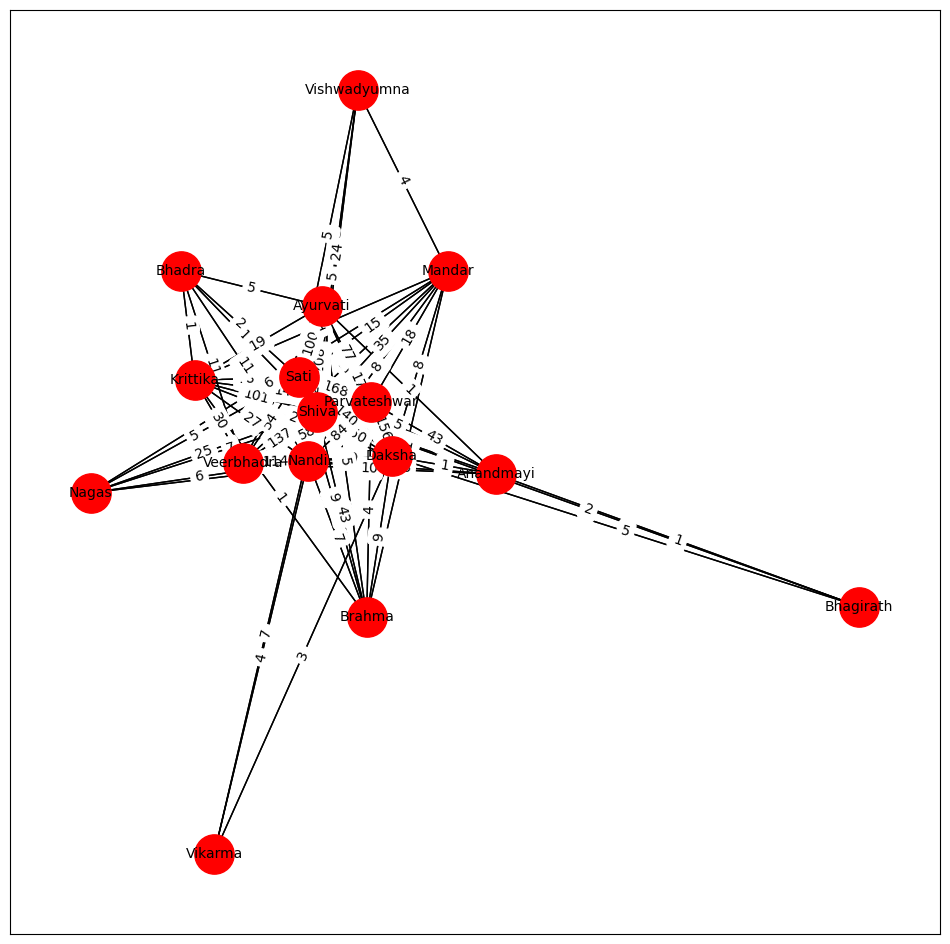

In [24]:
# PLOTTING THE GRAPH 

plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=10, node_color="red")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [25]:
# PRINTING NODES AS TUPLES OF NODES + EDGE ATTRIBUTES
list(G.edges(data=True))

[('Shiva', 'Sati', {'weight': 647}),
 ('Shiva', 'Daksha', {'weight': 350}),
 ('Shiva', 'Brahma', {'weight': 43}),
 ('Shiva', 'Nandi', {'weight': 446}),
 ('Shiva', 'Veerbhadra', {'weight': 137}),
 ('Shiva', 'Krittika', {'weight': 101}),
 ('Shiva', 'Parvateshwar', {'weight': 468}),
 ('Shiva', 'Bhadra', {'weight': 103}),
 ('Shiva', 'Anandmayi', {'weight': 44}),
 ('Shiva', 'Bhagirath', {'weight': 2}),
 ('Shiva', 'Vishwadyumna', {'weight': 24}),
 ('Shiva', 'Vikarma', {'weight': 7}),
 ('Shiva', 'Ayurvati', {'weight': 208}),
 ('Shiva', 'Mandar', {'weight': 35}),
 ('Shiva', 'Nagas', {'weight': 25}),
 ('Sati', 'Daksha', {'weight': 140}),
 ('Sati', 'Brahma', {'weight': 9}),
 ('Sati', 'Nandi', {'weight': 85}),
 ('Sati', 'Veerbhadra', {'weight': 54}),
 ('Sati', 'Krittika', {'weight': 78}),
 ('Sati', 'Parvateshwar', {'weight': 168}),
 ('Sati', 'Bhadra', {'weight': 2}),
 ('Sati', 'Anandmayi', {'weight': 5}),
 ('Sati', 'Vishwadyumna', {'weight': 5}),
 ('Sati', 'Ayurvati', {'weight': 100}),
 ('Sati', 

<h4> PART-C     CENTRALITY ANALYSIS </h4>

In [26]:
# DEGREE CENTRALITY
from operator import itemgetter
degc = nx.degree_centrality(G)
# let's list the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('Shiva', 1.0),
 ('Nandi', 0.9333333333333333),
 ('Sati', 0.8666666666666667),
 ('Daksha', 0.8666666666666667),
 ('Parvateshwar', 0.7333333333333333),
 ('Veerbhadra', 0.6666666666666666),
 ('Krittika', 0.6666666666666666),
 ('Ayurvati', 0.6666666666666666),
 ('Mandar', 0.6666666666666666),
 ('Brahma', 0.5333333333333333),
 ('Anandmayi', 0.5333333333333333),
 ('Bhadra', 0.4),
 ('Nagas', 0.4),
 ('Vishwadyumna', 0.26666666666666666),
 ('Bhagirath', 0.2),
 ('Vikarma', 0.2)]

In [27]:
# BETWEENESS CENTRALITY
betc = nx.betweenness_centrality(G)
sorted(betc.items(), key=itemgetter(1), reverse=True)

[('Shiva', 0.1481859410430839),
 ('Nandi', 0.08945578231292517),
 ('Daksha', 0.08374149659863946),
 ('Sati', 0.051360544217687085),
 ('Mandar', 0.02023809523809524),
 ('Anandmayi', 0.015873015873015876),
 ('Parvateshwar', 0.015487528344671203),
 ('Ayurvati', 0.011122448979591838),
 ('Veerbhadra', 0.011122448979591837),
 ('Krittika', 0.009365079365079366),
 ('Brahma', 0.0011904761904761906),
 ('Bhadra', 0.0),
 ('Bhagirath', 0.0),
 ('Vishwadyumna', 0.0),
 ('Vikarma', 0.0),
 ('Nagas', 0.0)]

In [28]:
# CLOSENESS CENTRALITY
closc = nx.closeness_centrality(G)
sorted(closc.items(), key=itemgetter(1), reverse=True)

[('Shiva', 1.0),
 ('Nandi', 0.9375),
 ('Sati', 0.8823529411764706),
 ('Daksha', 0.8823529411764706),
 ('Parvateshwar', 0.7894736842105263),
 ('Veerbhadra', 0.75),
 ('Krittika', 0.75),
 ('Ayurvati', 0.75),
 ('Mandar', 0.75),
 ('Brahma', 0.6818181818181818),
 ('Anandmayi', 0.6818181818181818),
 ('Bhadra', 0.625),
 ('Nagas', 0.625),
 ('Vishwadyumna', 0.5769230769230769),
 ('Bhagirath', 0.5555555555555556),
 ('Vikarma', 0.5555555555555556)]

In [29]:
# PAGE RANK
print('\n sorted pagerank:\n')
pgr=nx.pagerank(G)
sorted(pgr.items(), key=itemgetter(1), reverse=True)


 sorted pagerank:



[('Shiva', 0.28691415805827575),
 ('Sati', 0.13807009960315036),
 ('Parvateshwar', 0.11794708976844637),
 ('Nandi', 0.09938981863706911),
 ('Daksha', 0.08626476088210394),
 ('Ayurvati', 0.05416486181827302),
 ('Veerbhadra', 0.05219373016995495),
 ('Krittika', 0.03510857577582144),
 ('Anandmayi', 0.021829475188178946),
 ('Bhadra', 0.021827434335996307),
 ('Mandar', 0.020550446760746136),
 ('Brahma', 0.01684511311673541),
 ('Nagas', 0.014778669267803121),
 ('Vishwadyumna', 0.013209175328491795),
 ('Vikarma', 0.010701211552661492),
 ('Bhagirath', 0.01020537973629195)]

<h4> PART - D. CLUSTERING COEFFICIENTS </h4>

In [30]:
# TRANSITIVITY 
print(nx.transitivity(G))

0.7313868613138687


In [31]:
# GLOBAL CLUSTERING COEFFICIENT 
print(nx.average_clustering(G))

0.8370109057609059


In [32]:
# LOCAL CLUSTERING COEFFICIENT
nx.clustering(G)

{'Shiva': 0.5428571428571428,
 'Sati': 0.6794871794871795,
 'Daksha': 0.6282051282051282,
 'Brahma': 0.9642857142857143,
 'Nandi': 0.6043956043956044,
 'Veerbhadra': 0.8444444444444444,
 'Krittika': 0.8666666666666667,
 'Parvateshwar': 0.8181818181818182,
 'Bhadra': 1.0,
 'Anandmayi': 0.8214285714285714,
 'Bhagirath': 1.0,
 'Vishwadyumna': 1.0,
 'Vikarma': 1.0,
 'Ayurvati': 0.8444444444444444,
 'Mandar': 0.7777777777777778,
 'Nagas': 1.0}

<h4> PART E - DETECTING COMMUNITIES </h4>

<h5> K - Clique Percolation Method </h5>

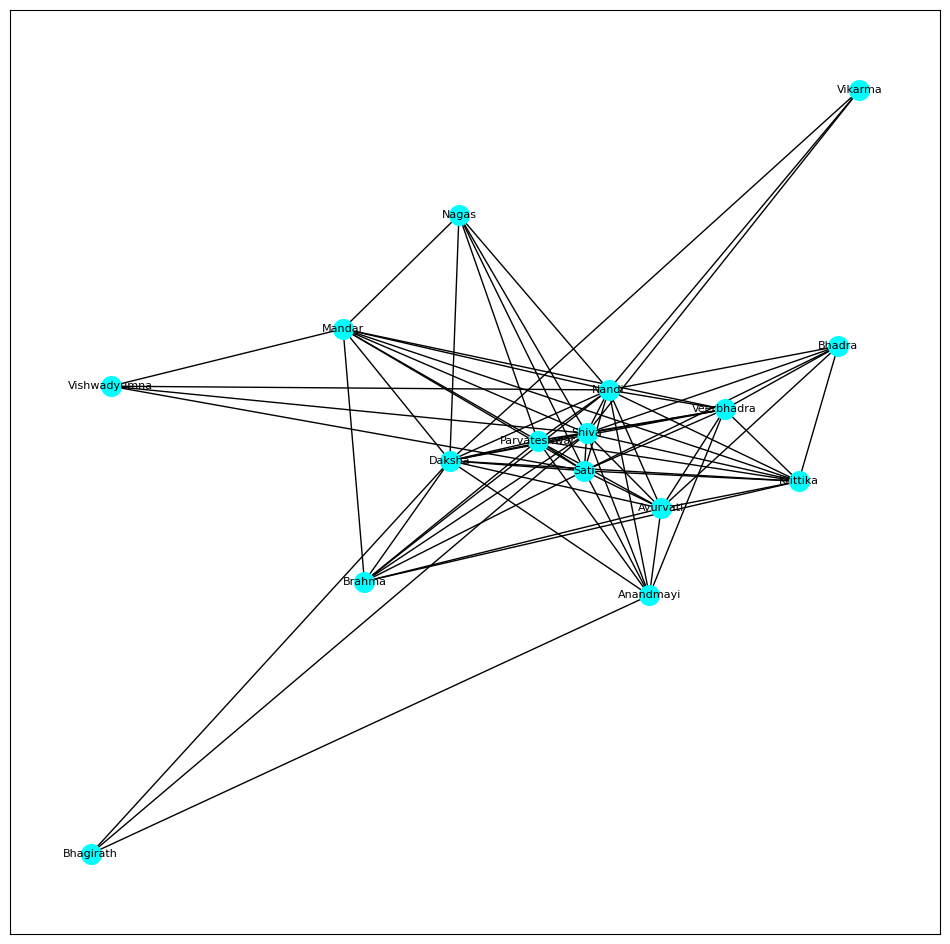

In [33]:
#Clique Percolation Method

plt.figure(3, figsize=(12,12))
nx.draw_networkx(G,with_labels=True, node_size=200, font_size = 8, node_color='cyan')

In [34]:
# To search for all maximal cliques in a graph.
list(nx.find_cliques(G))  

[['Shiva', 'Nandi', 'Vikarma', 'Daksha'],
 ['Shiva', 'Nandi', 'Sati', 'Bhadra', 'Veerbhadra', 'Ayurvati', 'Krittika'],
 ['Shiva',
  'Nandi',
  'Sati',
  'Parvateshwar',
  'Daksha',
  'Veerbhadra',
  'Ayurvati',
  'Krittika'],
 ['Shiva',
  'Nandi',
  'Sati',
  'Parvateshwar',
  'Daksha',
  'Veerbhadra',
  'Ayurvati',
  'Anandmayi'],
 ['Shiva',
  'Nandi',
  'Sati',
  'Parvateshwar',
  'Daksha',
  'Veerbhadra',
  'Mandar',
  'Krittika'],
 ['Shiva',
  'Nandi',
  'Sati',
  'Parvateshwar',
  'Daksha',
  'Brahma',
  'Krittika',
  'Ayurvati'],
 ['Shiva',
  'Nandi',
  'Sati',
  'Parvateshwar',
  'Daksha',
  'Brahma',
  'Krittika',
  'Mandar'],
 ['Shiva', 'Nandi', 'Sati', 'Parvateshwar', 'Daksha', 'Nagas', 'Mandar'],
 ['Shiva', 'Nandi', 'Sati', 'Vishwadyumna', 'Mandar'],
 ['Shiva', 'Bhagirath', 'Daksha', 'Anandmayi']]

In [35]:
# Finds the maximal cliques and treats these as nodes. 
# The nodes are connected if they have common members in the original graph.
synthetic = nx.make_max_clique_graph(G)  
print(synthetic.edges())

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


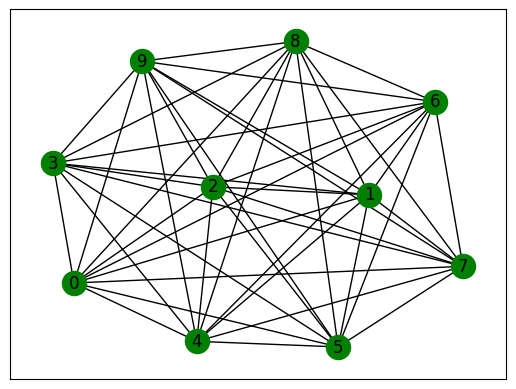

In [36]:
nx.draw_networkx(synthetic,node_color='green')

<h5>K-clique Community</h5>

In [37]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 4))
print(c)

[frozenset({'Vikarma', 'Bhadra', 'Veerbhadra', 'Ayurvati', 'Mandar', 'Daksha', 'Anandmayi', 'Sati', 'Parvateshwar', 'Brahma', 'Shiva', 'Nandi', 'Nagas', 'Krittika', 'Vishwadyumna', 'Bhagirath'})]


In [38]:
print(len(list(c)))

1


In [39]:
print(list(c[0]))

['Vikarma', 'Bhadra', 'Veerbhadra', 'Ayurvati', 'Mandar', 'Daksha', 'Anandmayi', 'Sati', 'Parvateshwar', 'Brahma', 'Shiva', 'Nandi', 'Nagas', 'Krittika', 'Vishwadyumna', 'Bhagirath']


<h5> Louvian community detection </h5>

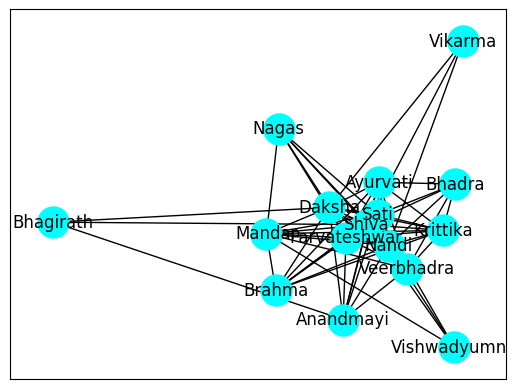

In [40]:


nx.draw_networkx(G,with_labels=True, node_size=500,node_color='cyan')



In [41]:
# measures of cohesion
partition = community.best_partition(G)
print(partition)
# Compute measures of cohesion for each community
for community_id in set(partition.values()):
    nodes = [node for node in partition.keys() if partition[node] == community_id]
    subgraph = G.subgraph(nodes)
    density = nx.density(subgraph)
    diameter = nx.diameter(subgraph)
    eccentricity = nx.eccentricity(subgraph)
    radius = nx.radius(subgraph)
    center = nx.center(subgraph)
    print(f"Community {community_id}: Density={density:.2f}, Diameter={diameter}, Radius={radius}, Center={center}")


{'Shiva': 0, 'Sati': 0, 'Daksha': 0, 'Brahma': 0, 'Nandi': 1, 'Veerbhadra': 1, 'Krittika': 1, 'Parvateshwar': 0, 'Bhadra': 0, 'Anandmayi': 1, 'Bhagirath': 0, 'Vishwadyumna': 0, 'Vikarma': 1, 'Ayurvati': 0, 'Mandar': 0, 'Nagas': 0}
Community 0: Density=0.60, Diameter=2, Radius=1, Center=['Shiva']
Community 1: Density=0.60, Diameter=2, Radius=1, Center=['Nandi']


<h5> Girvann Newmann </h5>

In [42]:
import community

from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['Anandmayi',
  'Ayurvati',
  'Bhadra',
  'Brahma',
  'Daksha',
  'Krittika',
  'Mandar',
  'Nagas',
  'Nandi',
  'Parvateshwar',
  'Sati',
  'Shiva',
  'Veerbhadra',
  'Vishwadyumna'],
 ['Bhagirath'],
 ['Vikarma']]

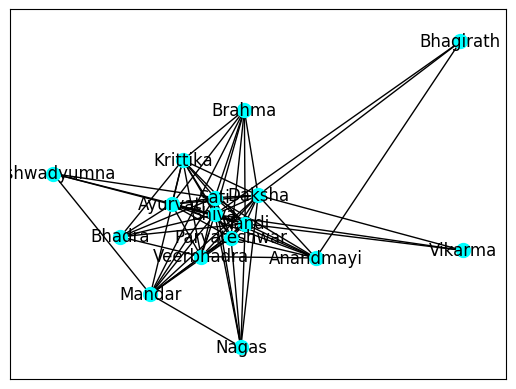

In [43]:
nx.draw_networkx(G,with_labels=True, node_size=100,node_color='cyan')

In [44]:
parti = community.best_partition(G)
print(parti)

{'Shiva': 0, 'Sati': 0, 'Daksha': 0, 'Brahma': 0, 'Nandi': 2, 'Veerbhadra': 2, 'Krittika': 2, 'Parvateshwar': 0, 'Bhadra': 0, 'Anandmayi': 2, 'Bhagirath': 0, 'Vishwadyumna': 1, 'Vikarma': 2, 'Ayurvati': 0, 'Mandar': 1, 'Nagas': 1}


<h4> PART F - DEGREE DISTRIBUTION AND GENERATIVE MODEL </h4>

<h5>DEGREE DISTRIBUTION AND GENERATIVE MODEL</h5>

In [45]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  16
Edges:  72
Average degree:  4.5


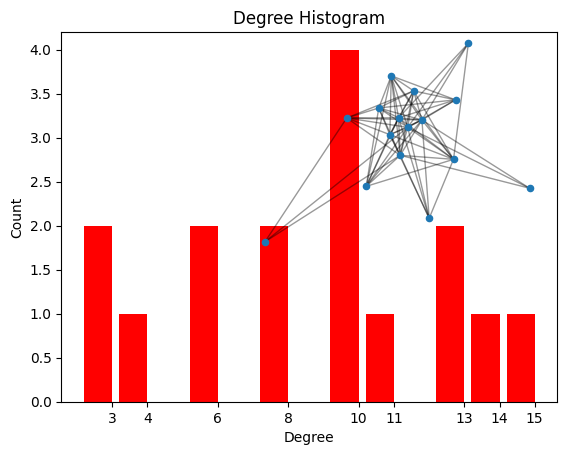

In [46]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='Red')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
# = list(A)[0]
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

<h5>Degree distribution </h5>

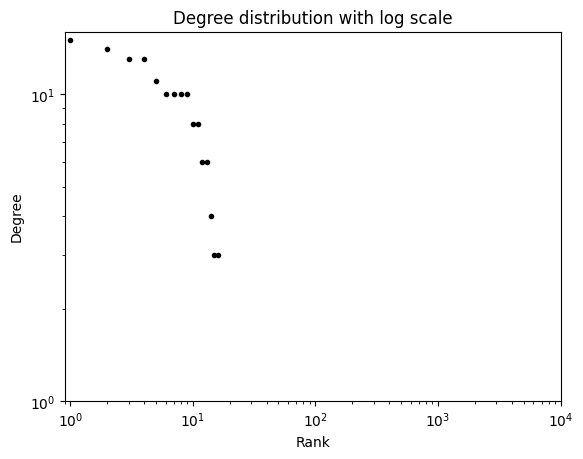

In [47]:
# loglog tells matplotlib to use log scales.
# The x values, range(1,10001), are the ranks, 
# and the degree_sequence are the y values.
# The String 'k.' means use black (k) dots (.)

degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

'''
Now we need to do some plotting. Plotting using matplotlib is a lot like 
plotting using MATLAB. Because the degree distribution of a BA graph is a 
power-law, we'd like to use a plot with log scales. Here is how we'd do it.

'''
plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree-distribution.png")

<h5>SIZE OF LARGEST COMPONENT</h5>

In [48]:
a = nx.is_connected(G)
s='\n Is a connected graph: ' +repr(a)
print (s)

no=len(list(nx.connected_components(G)))
s='\n no of connected components: ' +repr(no)
print (s)

#Gecum13ate a sorted list of connected components, largest first 
CoC=sorted(nx.connected_components(G), key = len, reverse=True)
for item in CoC:
    cclen=len(item)
    s= "\n Connected component length:" +repr(cclen)
    print (s)
    print ("\n Connected component :")
    print (item)


 Is a connected graph: True

 no of connected components: 1

 Connected component length:16

 Connected component :
{'Vikarma', 'Sati', 'Bhadra', 'Veerbhadra', 'Parvateshwar', 'Brahma', 'Shiva', 'Nandi', 'Krittika', 'Mandar', 'Ayurvati', 'Nagas', 'Daksha', 'Vishwadyumna', 'Bhagirath', 'Anandmayi'}


<h5>AVERAGE SHORTEST PATH</h5>

In [49]:
sum = 0
for i in range(len(characters)):
  for j in range(i, len(characters)):
    sum = sum + len(nx.shortest_path(G, characters[i], characters[j]))
avg_shortest_path = sum/(21*10) #21C2
print('Average shortest path of graph is: ', avg_shortest_path)

Average shortest path of graph is:  1.4476190476190476


<h5>COMPARING THE GENERATIVE MODELS WITH SOCIAL GRAPH GENERATED PREVIOUSLY</h5>

In [50]:
nodes=G.number_of_nodes()
nodes

16

In [51]:
#calculate average degree to use with random graph models 

degree_list = list(nx.degree(G))
#print(degree_list)
no_nodes=len(degree_list)
total_degree=0
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
avg_degree

Node  Shiva  : Degree is  15
Node  Sati  : Degree is  13
Node  Daksha  : Degree is  13
Node  Brahma  : Degree is  8
Node  Nandi  : Degree is  14


3.9375

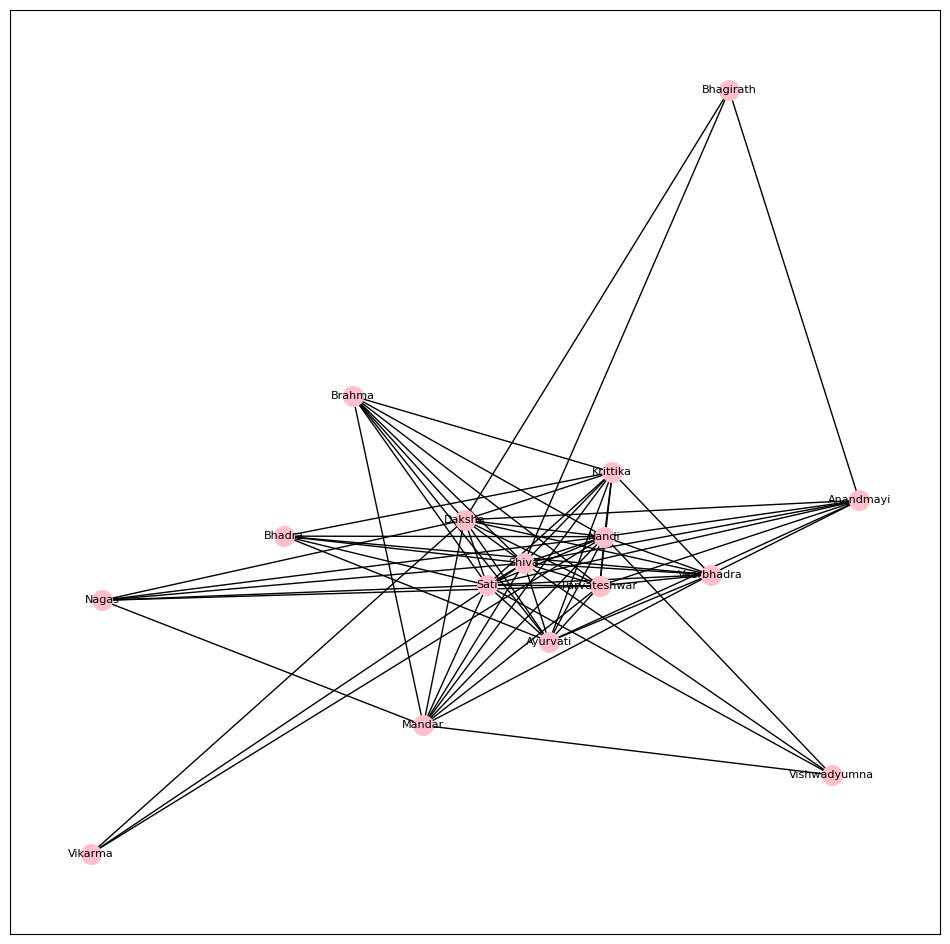

In [52]:
#Original graph
plt.figure(3, figsize=(12,12))
nx.draw_networkx(G,with_labels=True, node_size=200, font_size = 8, node_color='pink')

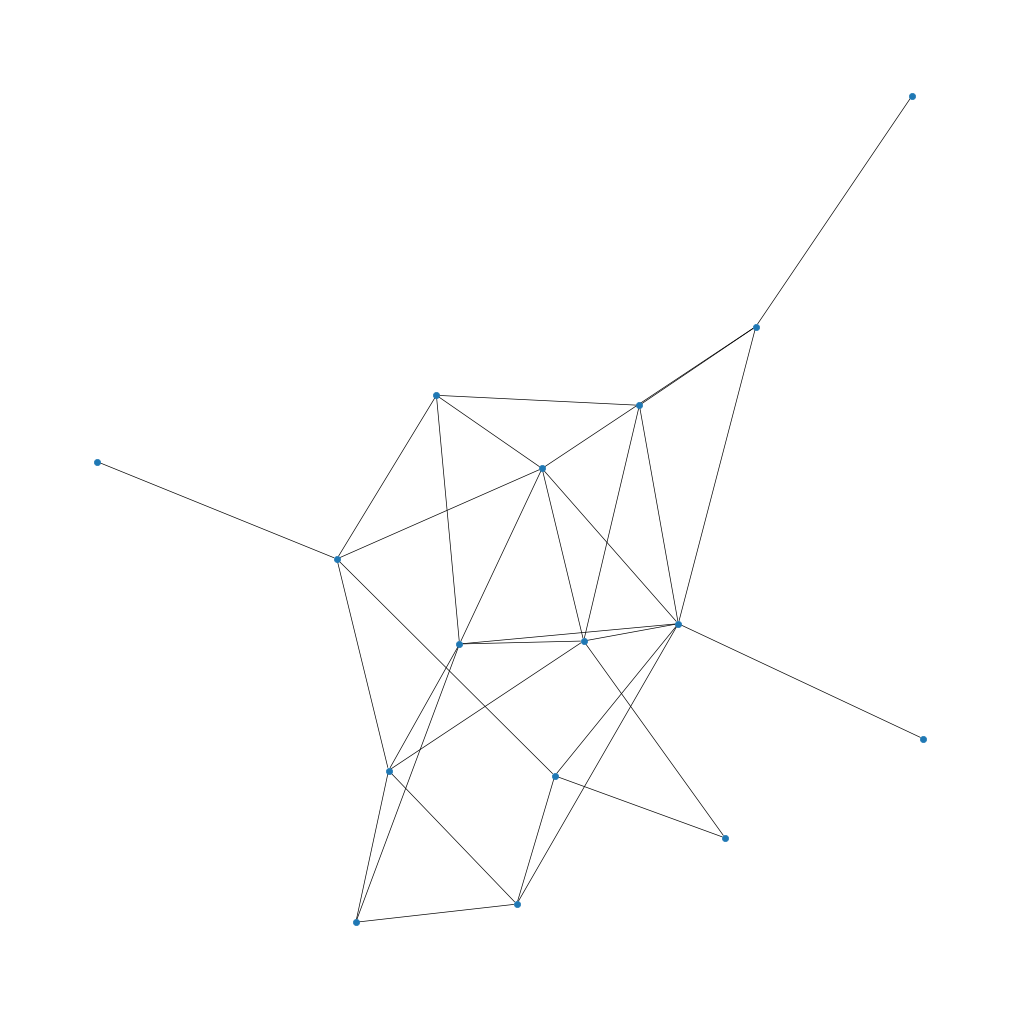

In [53]:
p=avg_degree/(no_nodes-1)
#G2 = nx.erdos_renyi_graph(no_nodes,p)  # same call 
G2 = nx.gnp_random_graph(no_nodes,p)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

<h4> Part F -(i) -  G(n) and G(n,m) generated graph </h6>

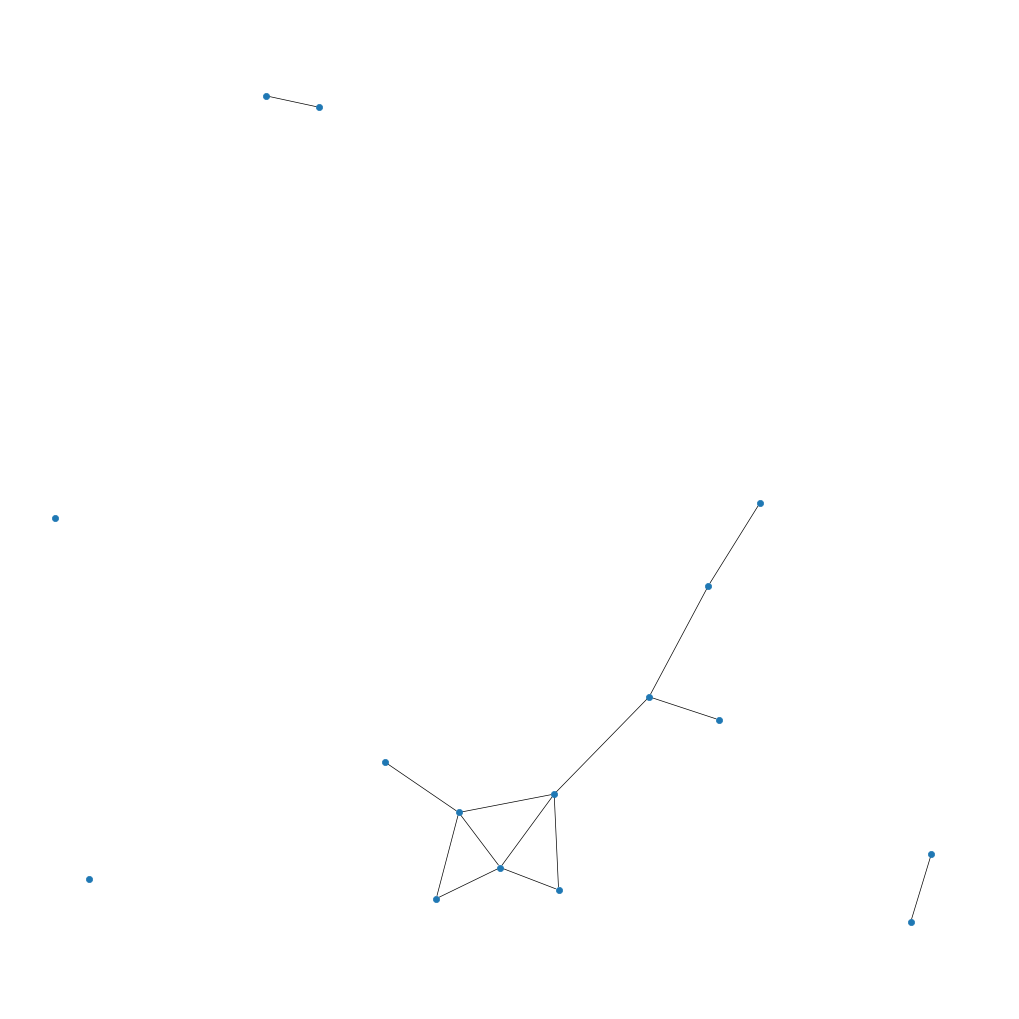

In [54]:
#Make random graph 
G2 = nx.gnp_random_graph(no_nodes,0.1)
#assuming probability for node creation 0.1 
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

<h4> Part F - (ii) -Preferential Attachment </h6>

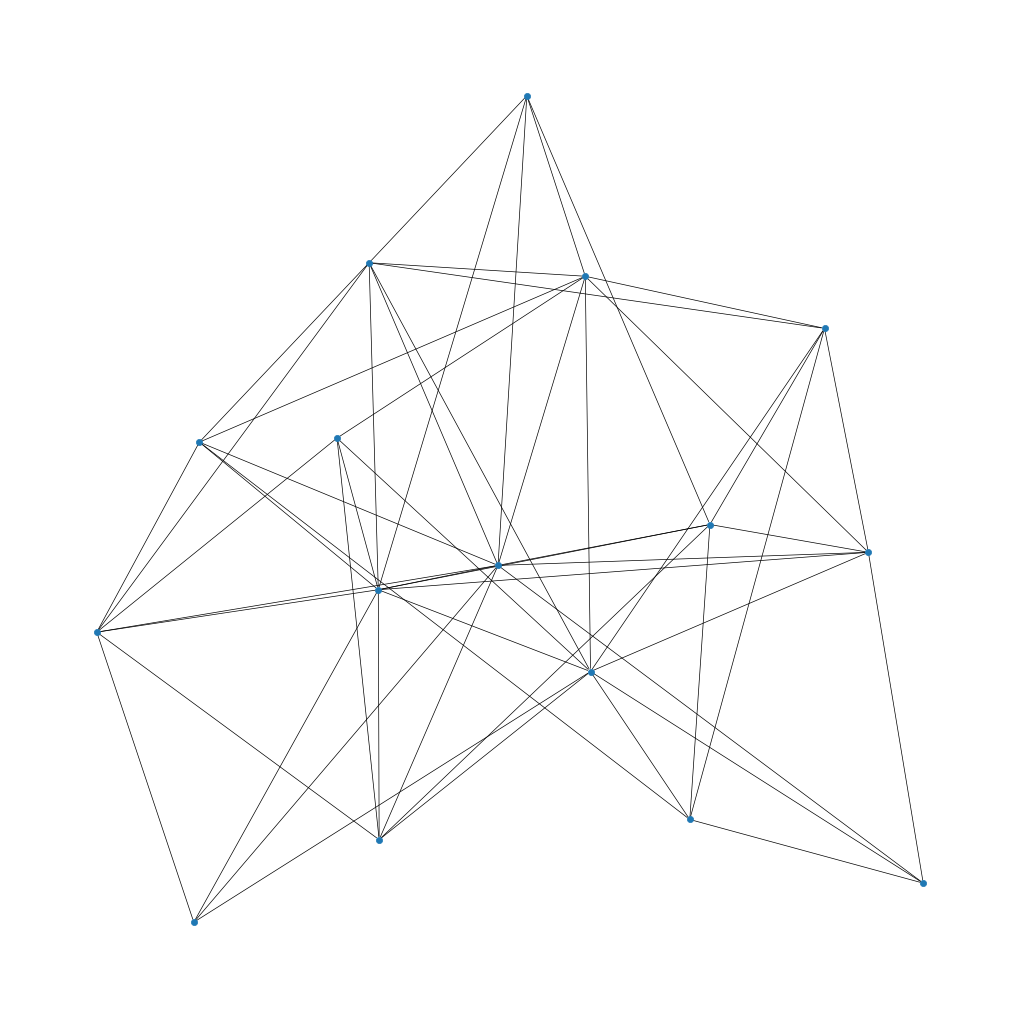

In [55]:
neighbours=5
H = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

<h4>Part F - (iii) -Small World Model</h6>

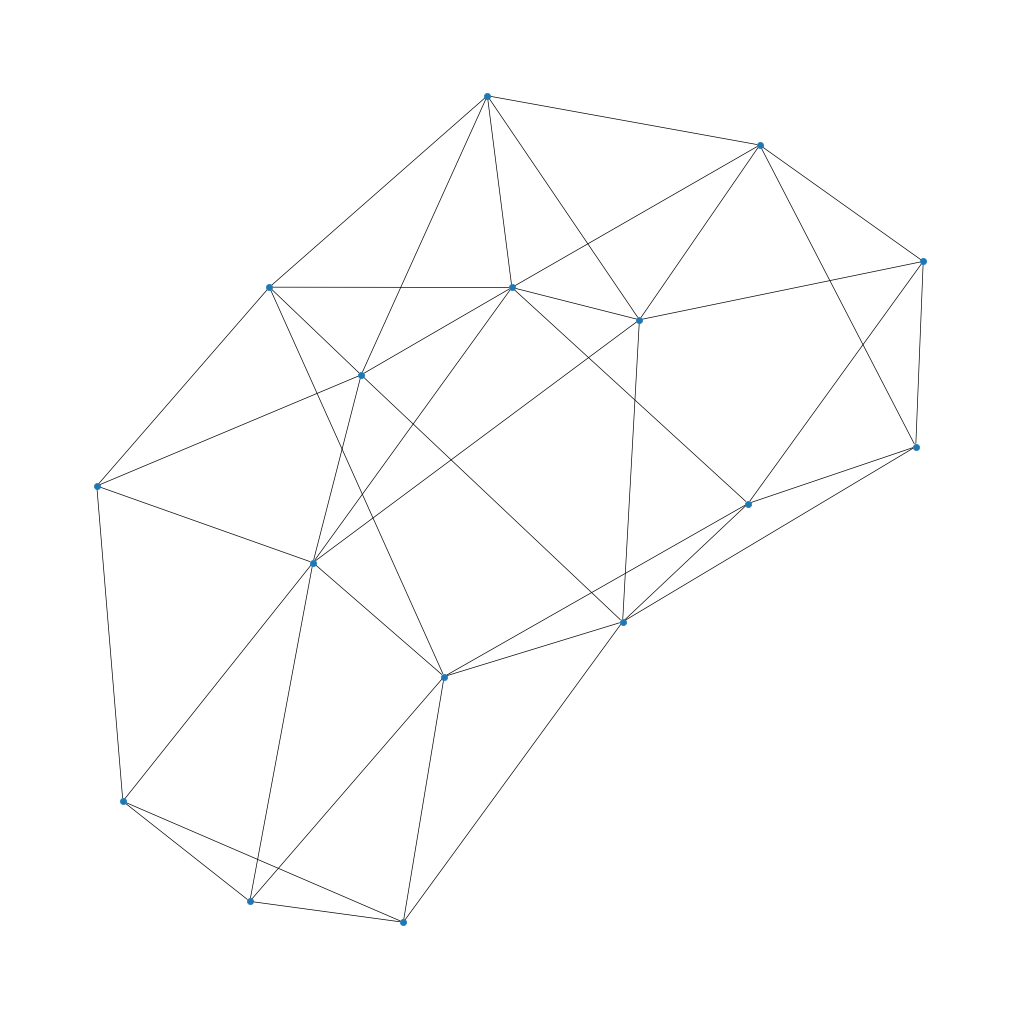

In [56]:
H = nx.newman_watts_strogatz_graph(no_nodes,neighbours,p)
fig = plt.figure(figsize =(10 ,10))

nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

<h1> Question 2 - Analysis </h1>

<h4> Theme of the Analysis </h4>
<h4> The story of Immortals of Meluha - Shiva </h4>
The Immortals of Meluha is the first novel in the Shiva Trilogy written by Amish Tripathi. It is a work of fiction set in ancient India and explores the story of Shiva, a tribal leader who is believed to be the savior of the land of Meluha.

The story is set in the year 1900 BC, in the land of Meluha, which is believed to be the ancient Indus Valley civilization. The Meluhans are a highly advanced society, with a sophisticated system of governance, medicine, and technology. However, they are also plagued by a disease called the "curse of the Branga," which is slowly decimating their population.

Shiva, a tribal leader from the mountains, is brought to Meluha by the tribe's leader, Daksha, who believes that Shiva is the prophesied savior known as the "Neelkanth." According to legend, the Neelkanth will appear in Meluha during their time of greatest need, and he will possess extraordinary powers that will help him defeat the evil forces that threaten their land.

Shiva is initially skeptical of his role as the savior, but he soon discovers that he possesses extraordinary powers, including the ability to control the elements and to heal people with his touch. He also falls in love with Sati, the daughter of Daksha, who becomes his ally and confidante.

As Shiva learns more about the Meluhan society, he discovers that their way of life is built on the exploitation of a group of people called the Nagas, who are believed to be cursed by the gods. Shiva begins to question the Meluhan way of life and their treatment of the Nagas, and he sets out to find a way to end the curse and bring about a more just society.

The Immortals of Meluha is a gripping tale of adventure, romance, and political intrigue. It explores themes of identity, social justice, and the nature of power, and it challenges readers to question their assumptions about the world and the people around them. The novel was a bestseller in India and has been translated into several languages.

<h5>The analysis made on this network implies the same. </h5>
<h5>For example, this story revolves around Shiva who is the protagonist. Centrality analysis results implies this. Shiva has the highest centrality coefficient comapred to others.   </h5>

<h4>Part A</h4> 

In [57]:
#Comparing centrality values to determine the protagnoist
from operator import itemgetter
degc = nx.degree_centrality(G)
# let's list the scores
deg_list = sorted(degc.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(deg_list[i])

('Shiva', 1.0)
('Nandi', 0.9333333333333333)
('Sati', 0.8666666666666667)
('Daksha', 0.8666666666666667)
('Parvateshwar', 0.7333333333333333)


In [58]:
betc = nx.betweenness_centrality(G)
bet_list = sorted(betc.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(bet_list[i])

('Shiva', 0.1481859410430839)
('Nandi', 0.08945578231292517)
('Daksha', 0.08374149659863946)
('Sati', 0.051360544217687085)
('Mandar', 0.02023809523809524)


In [59]:
closc = nx.closeness_centrality(G)
clo_list = sorted(closc.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(clo_list[i])

('Shiva', 1.0)
('Nandi', 0.9375)
('Sati', 0.8823529411764706)
('Daksha', 0.8823529411764706)
('Parvateshwar', 0.7894736842105263)


In [60]:
pgr=nx.pagerank(G)
pag_list = sorted(pgr.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(pag_list[i])

('Shiva', 0.28691415805827575)
('Sati', 0.13807009960315036)
('Parvateshwar', 0.11794708976844637)
('Nandi', 0.09938981863706911)
('Daksha', 0.08626476088210394)


In [61]:
#Centrality scatter plot 
def centrality_scatter(dict1,dict2,path="",ylab="",xlab="",title="",line=False):
    # Create figure and drawing axis
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]
    # Add each actor to the plot by ID
    for p in range(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")
        if line:
            # use NumPy to calculate the best fit
            slope, yint = plt.polyfit(xdata,ydata,1)
            xline = plt.xticks()[0]
            yline = map(lambda x: slope*x+yint,xline)
            ax1.plot(xline,yline,ls='--',color='b')
        # Set new x- and y-axis limits
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    plt.savefig(path)

In [62]:
cc=nx.closeness_centrality(G)
dc=nx.degree_centrality(G)
bc = nx.betweenness_centrality(G)
ec = nx.eigenvector_centrality(G,max_iter=1000)

sorted_dc=sorted(dc.items())
sorted_bc=sorted(bc.items())
sorted_cc=sorted(cc.items())
sorted_ec=sorted(ec.items())

#extract the centralities
deg_data=[y for x,y in sorted_dc]
close_data=[y for x,y in sorted_cc]
betw_data=[y for x,y in sorted_bc]
eig_data=[y for x,y in sorted_ec]

In [63]:
from scipy.stats.stats import pearsonr

r1=pearsonr(deg_data,betw_data)
s= "\n Pearson Correlation Coeff deg and betweenness: " + repr(r1)
print (s)

r2=pearsonr(deg_data,close_data)
s= "\n Pearson Correlation Coeff deg and closeness: " + repr(r2)
print (s)


r3=pearsonr(betw_data,close_data)
s= "\n Pearson Correlation Coeff betweennness and closeness: " + repr(r3)
print (s)

r4=pearsonr(betw_data,eig_data)
s= "\n Pearson Correlation Coeff betweennness and eigenvector : " + repr(r4)
print (s)


 Pearson Correlation Coeff deg and betweenness: PearsonRResult(statistic=0.7892468820259421, pvalue=0.000277827085123042)

 Pearson Correlation Coeff deg and closeness: PearsonRResult(statistic=0.9845374120786963, pvalue=5.440386912944855e-12)

 Pearson Correlation Coeff betweennness and closeness: PearsonRResult(statistic=0.8771348086597655, pvalue=8.141472720648952e-06)

 Pearson Correlation Coeff betweennness and eigenvector : PearsonRResult(statistic=0.6745940387872297, pvalue=0.004150344953365782)
/tmp/ipykernel_440/1984395486.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


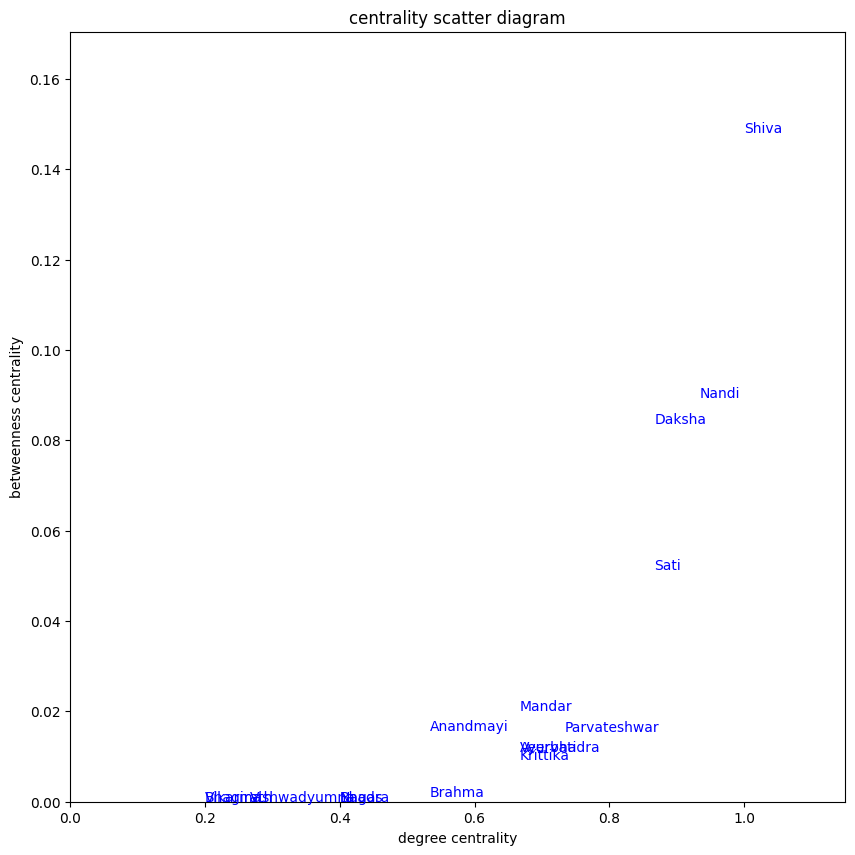

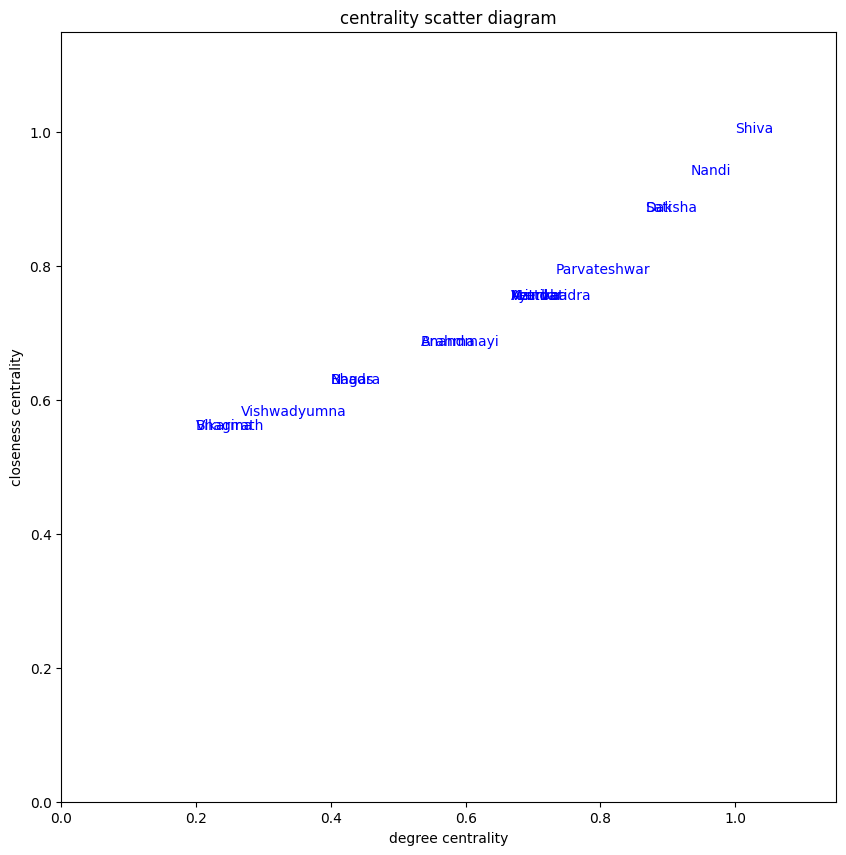

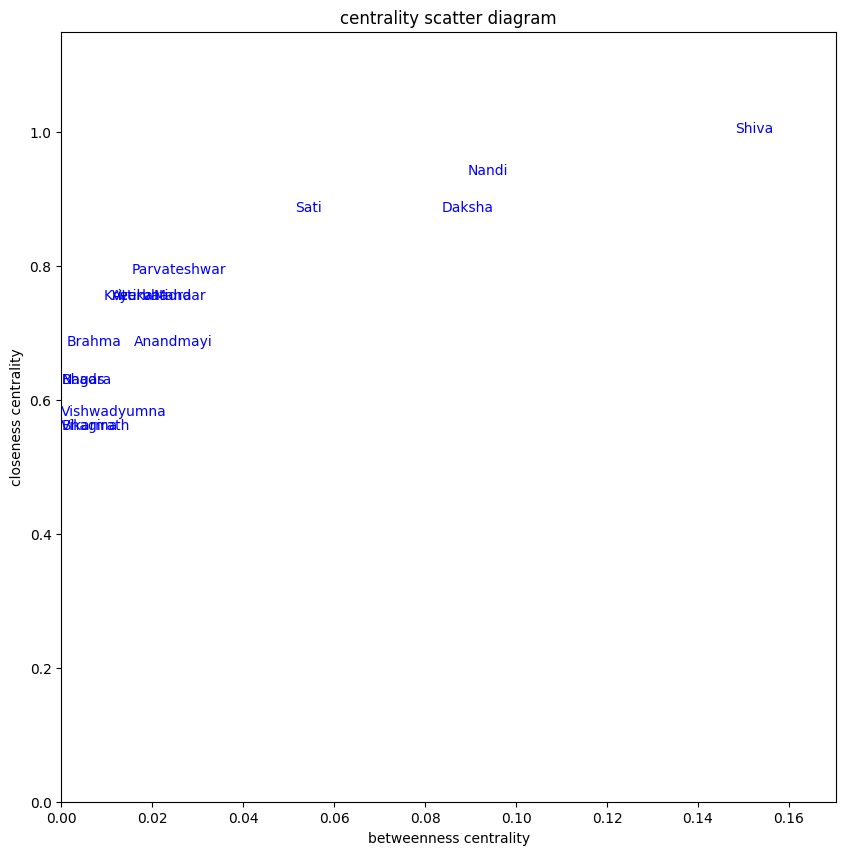

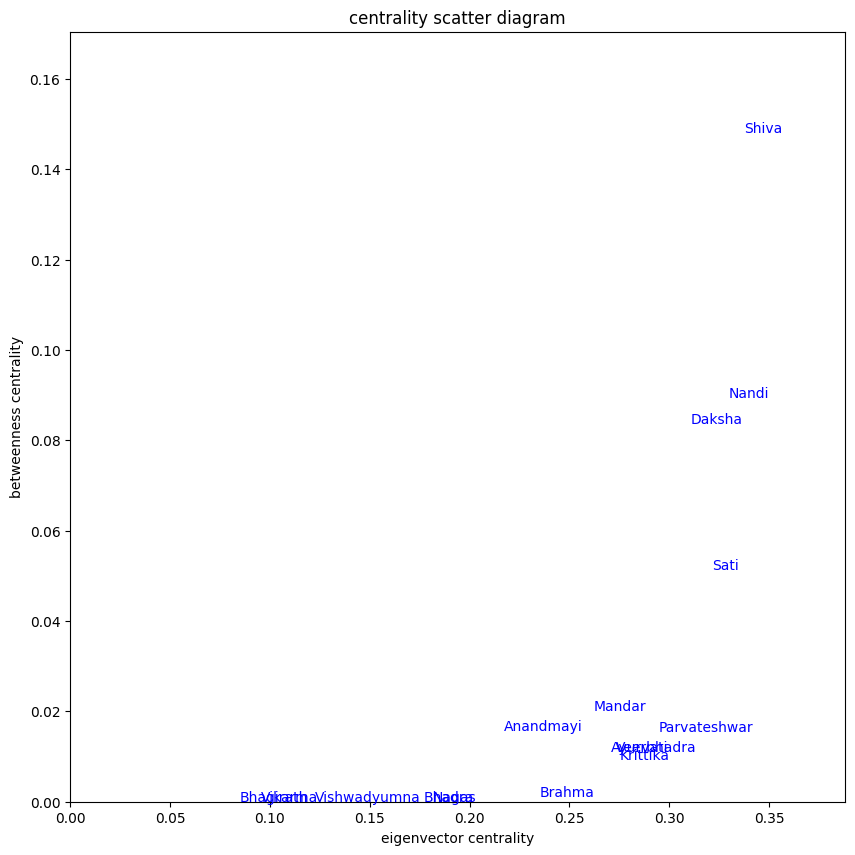

In [64]:
# Draw centrality scatter 
centrality_scatter(dc,bc,path="cum18bcdc",ylab="betweenness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(dc,cc,path="cum18ccdc",ylab="closeness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(bc,cc,path="cum18ccbc",ylab="closeness centrality",xlab="betweenness centrality",title="centrality scatter diagram",line=False)
centrality_scatter(ec,bc,path="cum18bcec",ylab="betweenness centrality",xlab="eigenvector centrality",title="centrality scatter diagram",line=False)

<h5>Shiva is the protagonist according to our analysis because Shiva has the higest centrality values in terms of Betweeness, Closeness, Degree Centrality and Page Rank. </h5>

<h6>In case, if the 4 centralities do not have hight correlation, then it can suggest that different nodes or actors are important for different reasons. For example, a node with high degree centrality may be important because it is connected to many other nodes, while a node with high betweenness centrality may be important because it acts as a bridge between different groups or clusters in the network.

In terms of identifying protagonists in a graph analysis, it is important to consider the specific context and purpose of the analysis. Depending on the goals of the analysis, different centrality measures may be more or less relevant for identifying the key actors in the network. It may be necessary to use multiple centrality measures and other analytical techniques to fully understand the role of different actors and the dynamics of the network as a whole. </h6>

<h4> PART-B <h4>

In [65]:
#EGO NETWORK

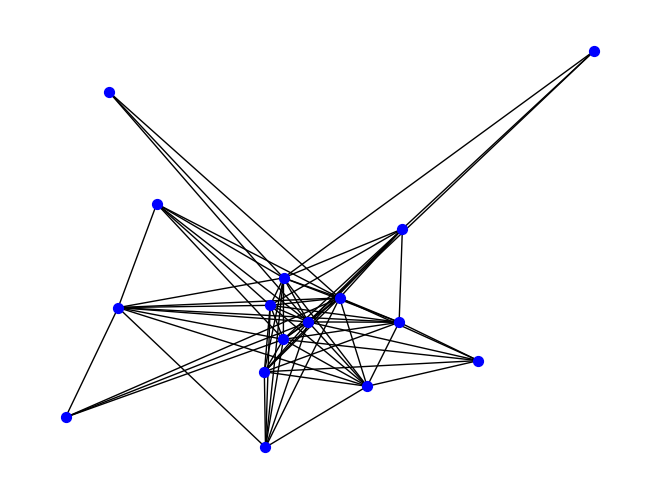

In [66]:
s='Shiva'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
#plt.savefig('Medici.png')
plt.show()
nx.write_gml(hub_ego,"egonw_paul.gml")

The ego network is essentially the whole graph which shows that the ego i.e. the protagonist is well connected to all the other characters.




In [67]:
#AVERAGE SHORTEST PATH
sum = 0
for i in range(len(characters)):
  for j in range(i+1, len(characters)):
    sum = sum + len(nx.shortest_path(G, characters[i], characters[j]))
avg_shortest_path = sum/(21*10) #21C2
print('Average shortest path of graph is: ', avg_shortest_path)

Average shortest path of graph is:  1.3714285714285714


<h5>Generative models are supposed to have a small average geodesic and our model also has a small average shortest path.</h5>

In [68]:
#CLUSTERING COEFFICIENT

In [69]:
#Local clustering coeff for characters
nx.clustering(G)

{'Shiva': 0.5428571428571428,
 'Sati': 0.6794871794871795,
 'Daksha': 0.6282051282051282,
 'Brahma': 0.9642857142857143,
 'Nandi': 0.6043956043956044,
 'Veerbhadra': 0.8444444444444444,
 'Krittika': 0.8666666666666667,
 'Parvateshwar': 0.8181818181818182,
 'Bhadra': 1.0,
 'Anandmayi': 0.8214285714285714,
 'Bhagirath': 1.0,
 'Vishwadyumna': 1.0,
 'Vikarma': 1.0,
 'Ayurvati': 0.8444444444444444,
 'Mandar': 0.7777777777777778,
 'Nagas': 1.0}

<h5>The main protagonist Shiva has the lowest clustering coefficient which signifies that he is the central character.</h5>

The characters that have a high clustering coefficent are not central characters.

In [70]:
#COMMUNITIES
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 4))
print(c)

[frozenset({'Vikarma', 'Bhadra', 'Veerbhadra', 'Ayurvati', 'Mandar', 'Daksha', 'Anandmayi', 'Sati', 'Parvateshwar', 'Brahma', 'Shiva', 'Nandi', 'Nagas', 'Krittika', 'Vishwadyumna', 'Bhagirath'})]


In [71]:
print(len(list(c)))

1


In [72]:
print(list(c[0]))

['Vikarma', 'Bhadra', 'Veerbhadra', 'Ayurvati', 'Mandar', 'Daksha', 'Anandmayi', 'Sati', 'Parvateshwar', 'Brahma', 'Shiva', 'Nandi', 'Nagas', 'Krittika', 'Vishwadyumna', 'Bhagirath']


<h5>Community 1 : Only one community is observed. This means that all the above mentioned characters belong to the same tribe/group.</h5>





<h5> The clustering coefficient and transitivity are related in that they both measure the extent to which nodes in a network tend to form local clusters or groups. In fact, the clustering coefficient can be used as a proxy for transitivity in some cases. This is because a high clustering coefficient indicates that many closed triangles exist in the network, which implies a high level of transitivity. However, it is important to note that the clustering coefficient and transitivity are not exactly the same thing. Transitivity is a more general measure of the tendency of nodes to form triangles, while the clustering coefficient is a more specific measure of the extent to which nodes form local clusters. Therefore, while a high clustering coefficient may indicate a high level of transitivity, it is possible to have high transitivity without a high clustering coefficient, and vice versa. </h6>


<h4>PART-C</h4>

<h4>Comparing generated graph to actual graph </h4>
The original graph refers to a graph that is given or constructed based on a specific context or situation. It can be any type of graph, such as a social network, a road network, a biological network, etc.

G(n,p) and G(n,m) generated graphs are random graph models. G(n,p) is a model in which a graph with n vertices is constructed by randomly adding an edge between each pair of vertices with probability p. G(n,m) is a model in which a graph with n vertices is constructed by randomly selecting m edges from the complete graph with n vertices.

Preferential attachment is a growth model that explains the evolution of many real-world networks, such as social networks, citation networks, and the World Wide Web. In this model, new vertices are added to the network one at a time, and each new vertex is more likely to connect to vertices that already have a high degree.

The small-world model is a network model that explains the phenomenon of "six degrees of separation," which suggests that any two people in the world are connected by a chain of at most six acquaintances. In this model, a regular lattice is rewired by randomly adding a small number of long-range connections.

The main difference between these models and the original graph is that the original graph reflects a real-world situation or context, while the models are abstract representations that are used to study the properties and behavior of networks. The generated graph models are random and have no specific context, whereas preferential attachment and small-world models are growth models that simulate the evolution of real-world networks.

We compare our graph with the Preferential Attachment model where the main feature is that nodes tend to get attached to other nodes that have a high degree. This largely follows social networks in real life. This model follows the power law distribution and has a low average shortest path length, but not a high clustering coefficient. Our graph has a low average shortest path length and a high clustering coefficient but it doesn't follow power law distribution and so the graph is partially consistent with this model because characters tend to get connected to our protagonists who play a central role in the story.








<h4>Differences between the 3 generated graph attributes </h4>
The three generated graph models, G(n,p), G(n,m), and Preferential attachment, have different attributes that distinguish them from each other.

<h5>Degree distribution</h5>The degree distribution of a graph refers to the probability distribution of the degrees of its vertices. In G(n,p) and G(n,m) models, the degree distribution is typically binomial or Poisson, respectively, with a narrow peak at the mean degree. In contrast, the preferential attachment model has a power-law degree distribution, which means that there are a few highly connected nodes, known as hubs, and many nodes with low connectivity.

<h5>Clustering coefficient</h5>The clustering coefficient measures the extent to which vertices in a graph tend to cluster together. In G(n,p) and G(n,m) models, the clustering coefficient is typically low, as the graphs are relatively random. In the preferential attachment model, the clustering coefficient is also low, as the model tends to create a few highly connected nodes that are not well connected to each other.

<h5>Path length</h5>The path length is the number of edges that must be traversed to go from one vertex to another in a graph. In G(n,p) and G(n,m) models, the path length is typically relatively long, as the graphs are not well connected. In the preferential attachment model, the path length is relatively short, as there are a few highly connected nodes that act as hubs and reduce the distance between other nodes.

<h5>Robustness</h5>Robustness refers to a graph's ability to maintain its structural properties even when some of its nodes or edges are removed. In G(n,p) and G(n,m) models, the graphs are relatively fragile and are easily disrupted by the removal of a few nodes or edges. In the preferential attachment model, the graph is more robust, as the highly connected nodes act as a backbone that maintains the graph's structure even if some of the less connected nodes are removed.

In summary, the three generated graph models have different attributes that make them suitable for different applications. The G(n,p) and G(n,m) models are well-suited for simulating random graphs, while the preferential attachment model is better suited for modeling real-world networks with a power-law degree distribution.

<h4>PART-D</h4>

In [73]:
!pip install gephistreamer

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [74]:
import networkx as nx
import matplotlib.pyplot as plt
from gephistreamer import Streamer

data = f


In [75]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Tokenize the text data
tokens = word_tokenize(data)

# Remove stop words
# stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

# Create a frequency distribution of the words
freq_dist = nltk.FreqDist(tokens)

# Create a co-occurrence matrix of the words
#co_matrix = nltk.collocations.BigramAssocMeasures().pairwise(tokens)
co_matrix = char_df


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=81657973-ebfe-4a05-8794-0bdee481531a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>